In [85]:
import pandas as pd
import numpy as np


data=pd.read_csv('tmp.txt',header=None)
data.columns = ['runid','asn','moteid','collision']

Data = pd.DataFrame()
index=list(range(5000))
run=4
#print('**************',grouped.groups.keys())

for run in grouped.groups.keys():
    _grp          = grouped.get_group(run)
    grp           = _grp[['asn','collision' ]]
    grp_counts    = grp.groupby(['asn']).count().reset_index().sort_values(by='asn', ascending=True)
    grp_indexed   = grp_counts.set_index('asn')
    grp_filled    = grp_indexed.reindex(index, fill_value=0)
    grp_collision = grp_filled['collision']
    Data[run] = grp_collision

# add  last column to Data with average collisions over runs
Data['Average_nbr_collision']= Data.mean(axis=1)
#Data['standard_deviation']= Data.std()


#Data

<Figure size 432x288 with 0 Axes>

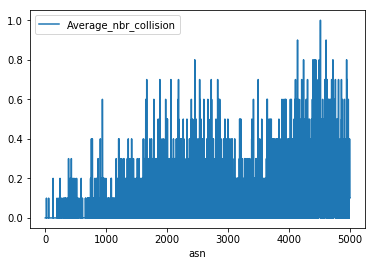

In [86]:
import matplotlib.pyplot as plt

plt.figure()

Data.plot(y='Average_nbr_collision')

#Data.plot(y='standard_deviation')
